# TEXT PREPROCESSING AND SENTIMENT ANALYSIS OF MOVIE REVIEWS

### Data Analysis

In [1]:
#pip install pandas
#pip install numpy

In [2]:
import pandas as pd
import numpy as np

In [3]:
print(pd.__version__)
print(np.__version__)

2.0.3
1.24.3


In [4]:
df = pd.read_csv('IMDB Dataset.csv')
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [5]:
#pd.set_option('display.max_colwidth', None)        for reviewing full length of reviews
#df.sample(2)

In [6]:
df.shape

(50000, 2)

Statistical Summary:

In [7]:
# Display summary statistics of categorical columns
df.describe(include='object')

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


Missing Values:

In [8]:
# Check for missing values
df.isnull().sum()


review       0
sentiment    0
dtype: int64

describe there is no missing value in the both column of data

##### Text Length Distribution:
Before Preprocessing

In [9]:
df['review_length'] = df['review'].apply(len)

max_length = df['review_length'].max()
print(max_length)

min_length = df['review_length'].min()
print(min_length)


13704
32


In [10]:
df['sentiment'].value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

### Data Visualization 

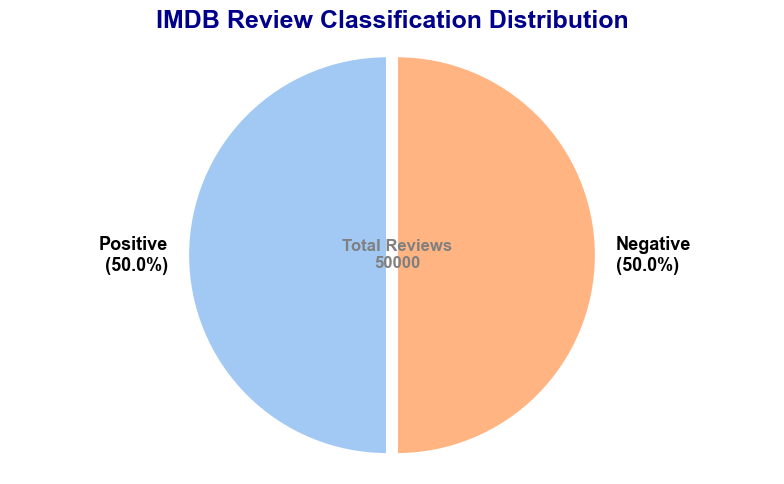

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

values = [25000, 25000]  # Values for 'positive' and 'negative'

# Set Seaborn style
sns.set(style='whitegrid')

# Define light and attractive colors from Seaborn palette
colors = sns.color_palette("pastel", 2)  # Using 'pastel' palette for soft colors

explode = (0.05, 0)  # Slightly explode the positive slice

# Create a smaller figure
plt.figure(figsize=(8, 5))  # Smaller size for the figure

# Create the pie chart with custom properties
wedges, texts, autotexts = plt.pie(
    values,
    labels=['Positive\n({:.1f}%)'.format(100 * values[0] / sum(values)), 
            'Negative\n({:.1f}%)'.format(100 * values[1] / sum(values))],
    autopct='',
    startangle=90,
    colors=colors,
    wedgeprops={'linewidth': 1.5, 'edgecolor': 'white'},
    explode=explode,
)

# Customize text properties
for text in texts:
    text.set(size=13, weight='bold', color='black')  # Slightly smaller text for better fit

# Add a title with more styling
plt.title('IMDB Review Classification Distribution', fontsize=18, fontweight='bold', color='darkblue')

# Add central annotations for better clarity
plt.text(0, 0, 'Total Reviews\n{}'.format(sum(values)), 
         horizontalalignment='center', verticalalignment='center', fontsize=12, 
         weight='bold', color='gray')

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Show the pie chart
plt.tight_layout()  # Adjusts the plot to fit into the figure area.
plt.show()


# DATA PREPROCESSING

##### Removing Duplicates:

In [12]:
# Remove duplicate rows(if any)
df = df.drop_duplicates()

##### Converting Text to Lowercase:

In [13]:
# Convert 'reviewText' to lowercase
df['review'] = df['review'].str.lower()


##### Removing stop words, punctuation, special characters, digits and whitespaces

In [14]:
#pip install nltk
import nltk
#nltk.download('punkt')
#nltk.download('stopwords')

In [15]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import re

In [16]:
def clean_txt(text):
  # Remove HTML tags like "(<.*?>)"
  return re.sub('(<.*?>)', ' ', text)

# Apply the cleaning function to each review in the 'review' column
df['review'] = df['review'].apply(clean_txt)

In [17]:
def clean_review(review):
    stop_words = set(stopwords.words('english'))

    # Tokenize the text
    words = word_tokenize(review)

    # remove whitespaces
    words = [word.strip() for word in words]

    # Remove stop words, punctuation, special characters, and digits
    cleaned_review = [re.sub(r'\W+|\d+', '', word) for word in words if word and word not in stop_words]

    return cleaned_review

# Apply the cleaning function to the 'review' column
df['review'] = df['review'].apply(clean_review)
df['review']

0        [one, reviewers, mentioned, watching, , oz, ep...
1        [wonderful, little, production, , filming, tec...
2        [thought, wonderful, way, spend, time, hot, su...
3        [basically, s, family, little, boy, , jake, , ...
4        [petter, mattei, s, , love, time, money, , vis...
                               ...                        
49995    [thought, movie, right, good, job, , nt, creat...
49996    [bad, plot, , bad, dialogue, , bad, acting, , ...
49997    [catholic, taught, parochial, elementary, scho...
49998    [m, going, disagree, previous, comment, side, ...
49999    [one, expects, star, trek, movies, high, art, ...
Name: review, Length: 49582, dtype: object

#### Lemmatization:

nltk.download('averaged_perceptron_tagger')

In [18]:
#nltk.download('wordnet')

In [19]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

# Initialize WordNet lemmatizer
lemmatizer = WordNetLemmatizer()

# Function to convert POS tagging to WordNet POS tags
def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN  # Assume default as noun

# Lemmatize the cleaned review
def lemmatize_text(cleaned_review):
    tagged_tokens = nltk.pos_tag(cleaned_review)  # Perform Part-of-Speech tagging
    lemmatized_tokens = [lemmatizer.lemmatize(word, get_wordnet_pos(pos_tag)) for word, pos_tag in tagged_tokens]
    lemmatized_review = ' '.join(lemmatized_tokens)  # Join the lemmatized tokens into a single string
    return lemmatized_review

# Apply lemmatization to the 'review' column
df['review'] = df['review'].apply(lemmatize_text)

In [20]:
print(df['review'])

0        one reviewer mention watch  oz episode ll hook...
1        wonderful little production  film technique un...
2        think wonderful way spend time hot summer week...
3        basically s family little boy  jake  think s z...
4        petter mattei s  love time money  visually stu...
                               ...                        
49995    think movie right good job  nt creative origin...
49996    bad plot  bad dialogue  bad act  idiotic direc...
49997    catholic teach parochial elementary school nun...
49998    m go disagree previous comment side maltin one...
49999    one expect star trek movie high art  fan expec...
Name: review, Length: 49582, dtype: object


In [21]:
#After Preprocessing review length

In [22]:
print(f"Maxreview len: {df['review'].str.len().max()}")
print(f"Minreview len: {df['review'].str.len().min()}")

Maxreview len: 8988
Minreview len: 20


# FEATURE EXTRACTION

Import TfidfVectorizer for converting text data into numerical format. TF-IDF stands for Term Frequency-Inverse Document Frequency, which helps measure the importance of a word in a document relative to a dataset.

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Feature Extraction using TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['review'])

#print("\nTF-IDF Feature Matrix:")
#print(X.toarray())

In [24]:
y = df["sentiment"]
# Encode the labels: Assuming you have 'positive' and 'negative' sentiments
y = y.map({'positive': 1, 'negative': 0})  # Convert labels to binary

## Split the Data

Divide the dataset into training and testing subsets. A typical split might be 80% for training and 20% for testing. This allows you to evaluate model performance on unseen data.

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,stratify= y, test_size=0.2, random_state=42)

In [26]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(39665, 123429)
(9917, 123429)
(39665,)
(9917,)


# MACHINE LEARNING MODEL

### Naive Bayes

In [27]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

model1 = MultinomialNB()
model1.fit(X_train, y_train)

# Make predictions on the test   
y_pred = model1.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.8610466875063023
Precision: 0.8721820062047569
Recall: 0.8472975688165562
F1-score: 0.8595597227884224


### Model Performance Report

    In this project, a Multinomial Naive Bayes classifier was employed to analyze movie reviews from the IMDb dataset. After training the model on the training set, it was evaluated on a separate test set to gauge its effectiveness.

    The model achieved an accuracy of approximately 86.1%, indicating a high level of correct predictions for the sentiment classification task. The precision score was 87.2%, meaning that when the model predicted a positive sentiment, it was accurate 87.2% of the time. This suggests that the model is reliable in identifying positive reviews, though there is still room for improvement, especially for edge cases.

    The recall score was 84.7%, reflecting the model's ability to capture the actual positive instances in the dataset. This metric indicates that while the model correctly identifies many positive reviews, it misses some as well. 

    The F1-score, which balances precision and recall, was calculated at 85.9%, showcasing that the model maintains a good balance between these two metrics. Overall, the performance metrics suggest that the Multinomial Naive Bayes model is effective for sentiment analysis in reviews, although improvements can be made to enhance recall and overall predictions. 

## Prediction of review

In [28]:
def predict_review(review):
    
    vectorized_review = vectorizer.transform([review])  # Vectorizing the single review
    prediction = model1.predict(vectorized_review)  # Using the model to predict sentiment

    # Convert the prediction to a human-readable format
    return "Positive" if prediction[0] == 1 else "Negative"

# Example usage
review = "I absolutely loved this movie! The performances were outstanding."
predicted_sentiment = predict_review(review)
print("Predicted sentiment:", predicted_sentiment)


Predicted sentiment: Positive
